## Урок 9. Линейная регрессия Логистическая регрессия

### Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

Шапиро-Уилка zp True
Шапиро-Уилка ks True
Корреляция 0.7876386635293684
ks = 444.1774+2.6205*zp


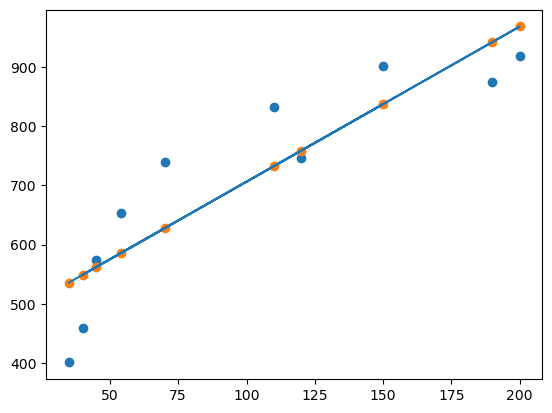

In [19]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

print(f'Шапиро-Уилка zp {stats.shapiro(zp)[1]>0.05}')
print(f'Шапиро-Уилка ks {stats.shapiro(ks)[1]>0.05}')

plt.scatter(zp, ks)
R = np.corrcoef(zp, ks)[0, 1] ** 2 
print(f'Корреляция {R}')

b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
b0 = np.mean(ks) - b1 * np.mean(zp)
print(f'ks = {round(b0,4)}+{round(b1,4)}*zp') 
ks1 = b0 + b1 * zp 
plt.scatter(zp, ks1)
plt.plot(zp, ks1)


In [15]:
#Интерсепт
from sklearn.linear_model import LinearRegression

model = LinearRegression()
zp1 = zp.reshape((-1,1))

regres = model.fit(zp1,ks)

print(f'ks = {round(regres.intercept_,4)}+{round(regres.coef_[0],4)}*zp')

ks = 444.1774+2.6205*zp



### Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [16]:
B0 = 1
B1 = 1
n = len(zp)
alpha = 5e-5
for i in range(10 ** 6 * 2):
    B1 -= alpha * (2 / n) * np.sum((B0 + B1 * zp - ks) * zp)
    B0 -= alpha * (2 / n) * np.sum((B0 + B1 * zp - ks))
    if i % 50000 == 0:
        print(B0, B1)
print(f'ks = {round(B0,4)}+{round(B1,4)}*zp') 

0.9925446082 7.72637
319.51502824471754 3.5381087420716133
409.11100221880963 2.878642760060478
434.31351738597 2.6931411055032335
441.4027507809284 2.6409612133145037
443.3968862787093 2.6262834943727165
443.95781806949253 2.622154788384688
444.11560297139556 2.620993421744373
444.1599863985479 2.6206667400970427
444.17247104430027 2.6205748475844
444.1759828591717 2.620548999074248
444.1769707000741 2.620541728128447
444.17724857053906 2.6205396828789684
444.17732673292005 2.620539107569286
444.1773487192703 2.620538945740027
444.1773549038294 2.620538900218938
444.17735664348703 2.6205388874142885
444.1773571328376 2.620538883812452
444.1773572704783 2.6205388827993557
444.1773573091881 2.6205388825144347
444.1773573200112 2.6205388824347713
444.17735732323916 2.620538882411012
444.17735732323916 2.620538882411012
444.17735732323916 2.620538882411012
444.17735732323916 2.620538882411012
444.17735732323916 2.620538882411012
444.17735732323916 2.620538882411012
444.17735732323916 2.62

### Задание 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [23]:
# Частная функция потерь
def mse_ab(a, b, x, y):
    return np.sum(((a + b * x)-y) ** 2) / len(x)

# Производная функция потерь по a
def mse_pa(a, b, x, y): 
    return 2 * np.sum((a + b * x) - y) / len(x)

# Производная функция потерь по b
def mse_pb(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)


alpha = 3e-5
b = 1
a = 1
mseab_min = mse_ab(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a 
for i in range(10**6*2):
    a -= alpha * mse_pa(a, b, zp, ks)
    b -= alpha * mse_pb(a, b, zp, ks)
    if i % 10000 == 0:
        print(f'Итерация = {i}, a = {a}, b = {b}, mse = {mse_ab(a, b, zp, ks)}'.format(i = i, a = a, b = b))

print(f'ks = {round(a,4)}+{round(b,4)}*zp') 


Итерация = 0, a = 1.03645, b = 5.0356002382, mse = 66157.5005713873
Итерация = 10000, a = 63.605481267468306, b = 5.421673519760567, mse = 43209.95949007567
Итерация = 20000, a = 117.33551739658967, b = 5.026202717169602, mse = 33568.31745768099
Итерация = 30000, a = 163.47982014901487, b = 4.686565416337576, mse = 26456.953368299593
Итерация = 40000, a = 203.10936127551741, b = 4.394878911643132, mse = 21211.84065390618
Итерация = 50000, a = 237.14391020614636, b = 4.144373396458446, mse = 17343.214741787422
Итерация = 60000, a = 266.37338115090694, b = 3.9292348414413842, mse = 14489.841084659725
Итерация = 70000, a = 291.47616636636565, b = 3.744470055641334, mse = 12385.284735159581
Итерация = 80000, a = 313.0348810883819, b = 3.585790798596791, mse = 10833.031872251793
Итерация = 90000, a = 331.54988555804476, b = 3.4495142537607397, mse = 9688.140241777148
Итерация = 100000, a = 347.4508979760808, b = 3.332477553322689, mse = 8843.705113420796
Итерация = 110000, a = 361.106967912